### Install ###

In [2]:
conda install conda-forge::openslide-python

\ WARNING conda.models.version:get_matcher(556): Using .* with relational operator is superfluous and deprecated and will be removed in a future version of conda. Your spec was 1.7.1.*, but conda is ignoring the .* and treating it as 1.7.1
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - conda-forge::openslide-python


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    ca-certificates-20

### test ###

In [1]:
import torch
torch.cuda.is_available()

False

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2080 Ti'

### Anomaly Detection ###

なぜか24と25 (23と24)が逆になっている (そもそも画像を取り込む段階？)

In [1]:
import argparse
import time
import os
import re
import sys
import datetime
from typing import List, Tuple, Union, Sequence

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from PIL import ImageOps, Image
import cv2
from openslide import OpenSlide

from torch.utils.data import Dataset, WeightedRandomSampler

sys.path.append("/workspace")
from data_handler import prep_dataloader

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM as OCSVM
import time

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import random

In [5]:
from sklearn.decomposition import PCA

In [6]:
from statistics import mean, median,variance,stdev

#### submission ####

In [39]:
root = "/workspace/fig/submission"
patch_size = 224

In [7]:
f_path_1 = "workspace/result_v5/1_layer4.npy"
feature_1 = np.load(f_path_1)
f_path_2 = "workspace/result_v5/2_layer4.npy"
feature_2 = np.load(f_path_2)
f_path_3 = "workspace/result_v5/3_layer4.npy"
feature_3 = np.load(f_path_3)
f_path_4 = "workspace/result_v5/4_layer4.npy"
feature_4 = np.load(f_path_4)
f_path_5 = "workspace/result_v5/5_layer4.npy"
feature_5 = np.load(f_path_5)
f_path_6 = "workspace/result_v5/6_layer4.npy"
feature_6 = np.load(f_path_6)
f_path_7 = "workspace/result_v5/7_layer4.npy"
feature_7 = np.load(f_path_7)
f_path_8 = "workspace/result_v5/8_layer4.npy"
feature_8 = np.load(f_path_8)
f_path_9 = "workspace/result_v5/9_layer4.npy"
feature_9 = np.load(f_path_9)
f_path_10 = "workspace/result_v5/10_layer4.npy"
feature_10 = np.load(f_path_10)
f_path_11 = "workspace/result_v5/11_layer4.npy"
feature_11 = np.load(f_path_11)
f_path_12 = "workspace/result_v5/12_layer4.npy"
feature_12 = np.load(f_path_12)

f_conc = list(feature_1)+list(feature_2)+list(feature_3)+list(feature_4)+list(feature_5)+list(feature_6)+list(feature_7)+list(feature_8)+list(feature_9)+list(feature_10)+list(feature_11)+list(feature_12)

#　学習データを標準化
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(f_conc)

total_p = len(feature_scaled)
nu = 0.05 #5%ぐらいは許容
gamma = 1/(256*3) 
ocsvm_224_mask_inside_wsl = OCSVM(kernel="rbf", gamma=gamma, nu=nu).fit(feature_scaled)

In [8]:
bach_dict = {}
comp_lst = ["Control"]*12+["TAA"]*12+["MDA"]*12
for i in range(36):
    bach_dict[i+1] = comp_lst[i]

day_dict = {}
day_lst = [7]*4+[14]*4+[28]*4
day_lst = day_lst*3
for i in range(36):
    day_dict[i+1] = day_lst[i]

inf_dict = {}
percentage_lst = []
ap = percentage_lst.append
sample_n = [13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
for i in sample_n:
    f_path = "workspace/result_v5/"+str(i)+"_layer4.npy"
    feature = np.load(f_path)
    feature_scaled = scaler.fit_transform(feature)
    jud = ocsvm_224_mask_inside_wsl.predict(feature_scaled)
    print("sample No."+str(i))
    print(len([i for i in jud if i == 1]))
    print(len([i for i in jud if i == -1]))
    print("Percentage of abnormal patches : "+str(len([i for i in jud if i == -1])/len([i for i in jud if i == 1])))
    ap(len([i for i in jud if i == -1])/len([i for i in jud if i == 1]))
inf_dict["compound"] = [bach_dict[i] for i in sample_n]
inf_dict["day"] = [day_dict[i] for i in sample_n]
inf_dict["percentage"] = percentage_lst

df_p = pd.DataFrame.from_dict(inf_dict)
df_p.index = sample_n
taa = df_p.loc[24, "compound":"day"]
mda = df_p.loc[25, "compound":"day"]
df_p.loc[24, "compound":"day"] = mda
df_p.loc[25, "compound":"day"] = taa

sample No.13
10996
1204
Percentage of abnormal patches : 0.10949436158603128
sample No.14
14288
900
Percentage of abnormal patches : 0.062989921612542
sample No.15
12748
1043
Percentage of abnormal patches : 0.0818167555695011
sample No.16
13485
1520
Percentage of abnormal patches : 0.11271783463107156
sample No.17
12564
835
Percentage of abnormal patches : 0.06645972620184655
sample No.18
9720
578
Percentage of abnormal patches : 0.059465020576131684
sample No.19
12269
641
Percentage of abnormal patches : 0.052245496780503706
sample No.21
8335
564
Percentage of abnormal patches : 0.06766646670665867
sample No.22
10451
679
Percentage of abnormal patches : 0.06496985934360348
sample No.23
12603
568
Percentage of abnormal patches : 0.04506863445211458
sample No.24
9846
1325
Percentage of abnormal patches : 0.1345724151939874
sample No.25
11723
1051
Percentage of abnormal patches : 0.08965281924422076
sample No.26
11300
1520
Percentage of abnormal patches : 0.13451327433628318
sample No.2

In [9]:
bach_dict[24] = "MDA"
bach_dict[25] = "TAA"

In [116]:
def ratio_plot(df_p, title="Abnormal Patch Ratio", figname=None):
    fig = plt.figure(figsize=(10, 7))
    y_max = max(df_p.loc[:, "percentage"])*1.1
    for i, d in enumerate([7, 14, 28]):
        df_p_day = df_p.loc[[df_p.loc[i, "day"] == d for i in df_p.index.tolist()], :]

        df_mda = df_p_day.loc[[df_p_day.loc[i, "compound"] == "MDA" for i in df_p_day.index.tolist()], :]
        df_mda = df_mda.loc[:, ["percentage"]]
        df_taa = df_p_day.loc[[df_p_day.loc[i, "compound"] == "TAA" for i in df_p_day.index.tolist()], :]
        df_taa = df_taa.loc[:, ["percentage"]]

        ax = fig.add_subplot(1, 3, i+1)
        ax2 = ax.twinx()

        width = 0.4
        x_position = np.arange(1)
        error_bar_set = dict(lw = 1.5, capthick = 1.5, capsize = 4)
        ax.bar(x_position+width/2, df_mda.mean(), yerr=df_mda.std(), tick_label=df_mda.columns, error_kw=error_bar_set, color='royalblue', width=0.97*width, label="MDA", alpha=.8)
        ax.bar(x_position-width/2, df_taa.mean(), yerr=df_taa.std(), tick_label=df_mda.columns, error_kw=error_bar_set, color='coral', width=0.97*width, label="TAA", alpha=.8)
        ax.bar(x_position, df_taa.mean(), tick_label=df_mda.columns, color='white', width=0, alpha=.1) # Adjustment of ticklabels position

        ax.legend(fontsize=18, loc=(0.5, 0.82))
        plt.grid(False)
        [ax.spines[side].set_visible(False) for side in ['right','top']]

        # jitter plot
        sns.stripplot(x='day', y='percentage', data=df_p_day, hue='compound', dodge=True, jitter=True, s=7, linewidth=1, edgecolor="black", palette=['orangered', 'mediumblue'], ax=ax2)
        # control line
        ax.hlines(y=0.05, xmin=-1.2*width, xmax=1.2*width, color="black", linestyles='dashed', linewidth=1.5, alpha=.8, zorder=1)

        ax.tick_params(axis='x', labelsize=16, direction='in', width=0)
        ax.tick_params(axis='y', labelsize=16)

        ax.set_xlim(-1.2*width,1.2*width)
        ax2.set_xlim(-1.2*width,1.2*width)
        ax.set_ylim(0,y_max)
        ax2.set_ylim(0,y_max)

        ax2.axis("off")
        ax2.get_legend().remove()

        if i == 0:
            ax.set_ylabel("raito", fontsize=20)
            ax.set_xticklabels(["day"+str(d)])
            ax.get_legend().remove()         
        elif i == len([7, 14, 28])-1:
            ax.set_xticklabels(["day"+str(d)])
        else:
            ax.set_xticklabels(["day"+str(d)])
            ax.get_legend().remove()  

    fig.suptitle(title, fontsize=24)
    plt.tight_layout()
    if figname:
        plt.savefig(figname, dpi=300)
    plt.show()

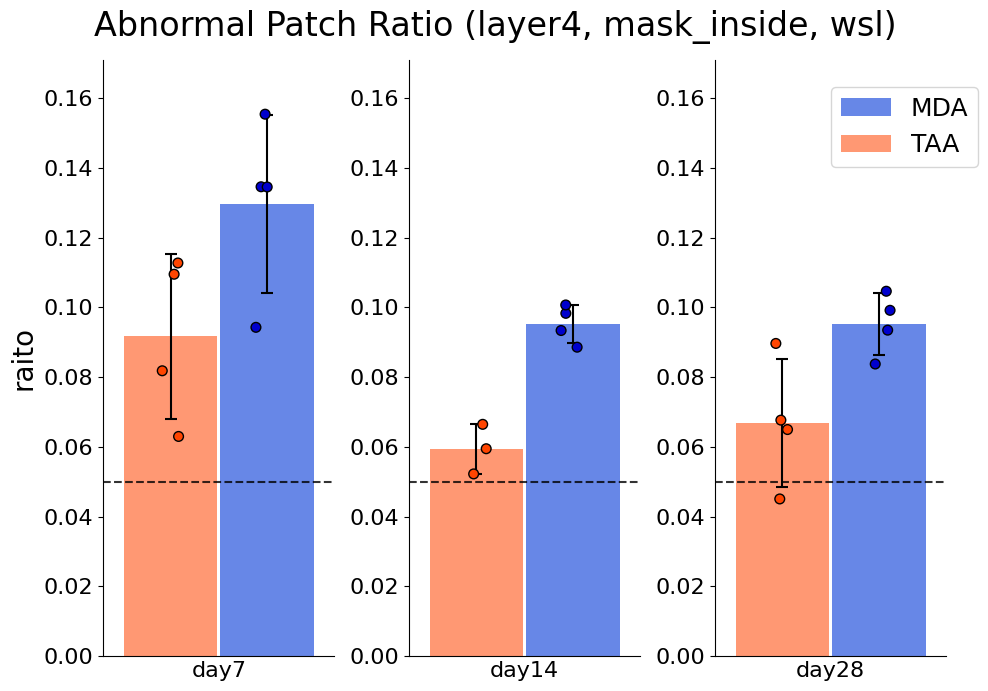

In [117]:
fig_name = "fig2a0.png"
name = f"{root}/{fig_name}"
ratio_plot(df_p, title="Abnormal Patch Ratio (layer4, mask_inside, wsl)", figname=name)

In [12]:
def get_info(sample_id, feature, location, jud):
    inf_lst = []
    max_n = len([i for i in jud if i == -1])
    print("max_n = ", str(max_n))
    n = 0
    ap = inf_lst.append
    for i in zip(jud, feature, location):
        if i[0] == -1:
            ap([sample_id, i[1], i[2], i[0]])
        elif i[0] == 1 and n < max_n:
            ap([sample_id, i[1], i[2], i[0]])
            n = n + 1
        else:
            pass

    return inf_lst

In [33]:
# 第一主成分と第二主成分でプロットする
def PCAplot_total_v2(feature_pca, pca_inf, bach_dict, seed1=2477, sample=100, pict_sample=3, loc1=[-0.8, -0.5, -0.25, 0.25], loc2=[0.5, 0.8, -0.6, -0.1], xnum=0, ynum=1, title="", figname=None):
    fig = plt.figure(figsize=(13, 4))
    ax1 = fig.add_subplot(1, 3, 3)
    ax2 = fig.add_subplot(1, 3, 1)
    ax3 = fig.add_subplot(1, 3, 2)

    label_lst = []
    ap = label_lst.append
    sample_no_lst = []
    ap_s = sample_no_lst.append
    loc_lst = []
    ap_loc = loc_lst.append
    
    random.seed(seed1)
    ran_sam = random.sample(range(len(feature_pca)), sample)

    color_dict = {"Control":"dimgray","TAA":"orangered", "MDA":"mediumblue"}

    xmax = max(feature_pca[:, xnum])
    xmin = min(feature_pca[:, xnum])
    ymax = max(feature_pca[:, ynum])
    ymin = min(feature_pca[:, ynum])

    for i in ran_sam:
        if pca_inf[i][2] == -1:
            if bach_dict[pca_inf[i][0]] + ", -1" not in label_lst:
                complabel = bach_dict[pca_inf[i][0]] + ", -1"
                ax1.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=0.5, color=color_dict[bach_dict[pca_inf[i][0]]], label=complabel)
                ax2.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=0.5, color=color_dict[bach_dict[pca_inf[i][0]]], label=complabel)
                ap(complabel)
                ap_s(pca_inf[i][0])
                print("pict_sample_no = ", str(pca_inf[i][0]))
            elif label_lst.count(bach_dict[pca_inf[i][0]]) < pict_sample and pca_inf[i][0] in sample_no_lst and loc1[0] < feature_pca[:, xnum][i] < loc1[1] and loc1[2] < feature_pca[:, ynum][i] < loc1[3]:
                ax1.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=0.5, color=color_dict[bach_dict[pca_inf[i][0]]])
                ax2.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=1.0, color=color_dict[bach_dict[pca_inf[i][0]]], linewidth=2, ec="black", zorder=2)
                if bach_dict[pca_inf[i][0]] == "MDA":
                    ax2.text(feature_pca[:, xnum][i], feature_pca[:, ynum][i], s = str(label_lst.count(bach_dict[pca_inf[i][0]])+1+pict_sample), weight="bold", fontsize=14, zorder=3)
                    ap_loc([label_lst.count(bach_dict[pca_inf[i][0]])+1+pict_sample, pca_inf[i][1], pca_inf[i][0]])
                else:
                    ax2.text(feature_pca[:, xnum][i], feature_pca[:, ynum][i], s = str(label_lst.count(bach_dict[pca_inf[i][0]])+1), weight="bold", fontsize=14, zorder=3)
                    ap_loc([label_lst.count(bach_dict[pca_inf[i][0]])+1, pca_inf[i][1], pca_inf[i][0]])
                ap(bach_dict[pca_inf[i][0]])
            elif label_lst.count(bach_dict[pca_inf[i][0]]) < pict_sample and pca_inf[i][0] in sample_no_lst and loc2[0] < feature_pca[:, xnum][i] < loc2[1] and loc2[2] < feature_pca[:, ynum][i] < loc2[3]:
                ax1.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=0.5, color=color_dict[bach_dict[pca_inf[i][0]]])
                ax2.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=1.0, color=color_dict[bach_dict[pca_inf[i][0]]], linewidth=2, ec="black", zorder=2)
                if bach_dict[pca_inf[i][0]] == "MDA":
                    ax2.text(feature_pca[:, xnum][i], feature_pca[:, ynum][i], s = str(label_lst.count(bach_dict[pca_inf[i][0]])+1+pict_sample), weight="bold", fontsize=14, zorder=3)
                    ap_loc([label_lst.count(bach_dict[pca_inf[i][0]])+1+pict_sample, pca_inf[i][1], pca_inf[i][0]])
                else:
                    ax2.text(feature_pca[:, xnum][i], feature_pca[:, ynum][i], s = str(label_lst.count(bach_dict[pca_inf[i][0]])+1), weight="bold", fontsize=14, zorder=3)
                    ap_loc([label_lst.count(bach_dict[pca_inf[i][0]])+1, pca_inf[i][1], pca_inf[i][0]])
                ap(bach_dict[pca_inf[i][0]])
            else:
                ax1.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=0.5, color=color_dict[bach_dict[pca_inf[i][0]]])
                ax2.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=0.5, color=color_dict[bach_dict[pca_inf[i][0]]])
        else:
            if bach_dict[pca_inf[i][0]] + ", 1" not in label_lst:
                complabel = bach_dict[pca_inf[i][0]] + ", 1"
                ax1.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=0.5, color="white", linewidth=1, ec=color_dict[bach_dict[pca_inf[i][0]]], label=complabel)
                ax3.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=0.5, color="white", linewidth=1, ec=color_dict[bach_dict[pca_inf[i][0]]], label=complabel)
                ap(complabel)
            else:
                ax1.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=0.5, color="white", linewidth=1, ec=color_dict[bach_dict[pca_inf[i][0]]])
                ax3.scatter(feature_pca[:, xnum][i], feature_pca[:, ynum][i], alpha=0.5, color="white", linewidth=1, ec=color_dict[bach_dict[pca_inf[i][0]]])

    for ax in [ax2, ax3, ax1]:
        #ax.set_title("", fontsize=18)

        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)

        ax.grid(False)
        [ax.spines[side].set_visible(False) for side in ['right','top']]

        ax.spines.bottom.set_color('black')
        ax.spines.left.set_color('black')
    
    ax2.hlines(y=loc1[3], xmin=loc1[0], xmax=loc1[1], color="orange", linestyles='dashed', linewidth=1.5, alpha=.8, zorder=1)
    ax2.hlines(y=loc1[2], xmin=loc1[0], xmax=loc1[1], color="orange", linestyles='dashed', linewidth=1.5, alpha=.8, zorder=1)
    ax2.vlines(x=loc1[0], ymin=loc1[2], ymax=loc1[3], color="orange", linestyles='dashed', linewidth=1.5, alpha=.8, zorder=1)
    ax2.vlines(x=loc1[1], ymin=loc1[2], ymax=loc1[3], color="orange", linestyles='dashed', linewidth=1.5, alpha=.8, zorder=1)

    ax2.hlines(y=loc2[3], xmin=loc2[0], xmax=loc2[1], color="orange", linestyles='dashed', linewidth=1.5, alpha=.8, zorder=1)
    ax2.hlines(y=loc2[2], xmin=loc2[0], xmax=loc2[1], color="orange", linestyles='dashed', linewidth=1.5, alpha=.8, zorder=1)
    ax2.vlines(x=loc2[0], ymin=loc2[2], ymax=loc2[3], color="orange", linestyles='dashed', linewidth=1.5, alpha=.8, zorder=1)
    ax2.vlines(x=loc2[1], ymin=loc2[2], ymax=loc2[3], color="orange", linestyles='dashed', linewidth=1.5, alpha=.8, zorder=1)

    ax2.legend()
    ax3.legend() 
    ax3.set_xlabel("PC"+str(xnum+1), fontsize=15)
    ax2.set_ylabel("PC"+str(ynum+1), fontsize=15)

    fig.suptitle(title, fontsize=18)

    plt.tick_params(bottom=True, left=True, right=False, top=False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    plt.tight_layout()
    if figname:
        plt.savefig(figname, dpi=300)
    plt.show()

    return loc_lst

In [15]:
total_inf_lst = []
for i in [13, 14, 15, 16, 24, 26, 27, 28]:
    f_path = "workspace/result_v5/"+str(i)+"_layer4.npy"
    l_path = "workspace/result_v5/"+str(i)+"_location.pickle"
    feature = np.load(f_path)
    location = pd.read_pickle(l_path)
    feature_scaled = scaler.fit_transform(feature)
    jud = ocsvm_224_mask_inside_wsl.predict(feature_scaled)
    print("sample No."+str(i))
    print(len([i for i in jud if i == 1]))
    print(len([i for i in jud if i == -1]))
    print("Percentage of abnormal patches : "+str(len([i for i in jud if i == -1])/len([i for i in jud if i == 1])))
    feature_inf_lst = get_info(i, feature_scaled, location, jud)
    total_inf_lst = total_inf_lst + feature_inf_lst

sample No.13
10996
1204
Percentage of abnormal patches : 0.10949436158603128
max_n =  1204
sample No.14
14288
900
Percentage of abnormal patches : 0.062989921612542
max_n =  900
sample No.15
12748
1043
Percentage of abnormal patches : 0.0818167555695011
max_n =  1043
sample No.16
13485
1520
Percentage of abnormal patches : 0.11271783463107156
max_n =  1520
sample No.24
9846
1325
Percentage of abnormal patches : 0.1345724151939874
max_n =  1325
sample No.26
11300
1520
Percentage of abnormal patches : 0.13451327433628318
max_n =  1520
sample No.27
9879
1535
Percentage of abnormal patches : 0.15538009920032392
max_n =  1535
sample No.28
12273
1157
Percentage of abnormal patches : 0.09427197914120428
max_n =  1157


In [16]:
pca_feature_l2 = []
ap = pca_feature_l2.append
for i in total_inf_lst:
    x = i[1]
    # l2 normalization
    x_l2_norm = sum(x**2)**0.5
    x_l2_normalized = x / x_l2_norm
    ap(x_l2_normalized)

pca = PCA()
pca.fit(pca_feature_l2)
feature_pca_l2 = pca.transform(pca_feature_l2)

pca_inf = [[i[0], i[2], i[3]] for i in total_inf_lst]

pict_sample_no =  13
pict_sample_no =  27


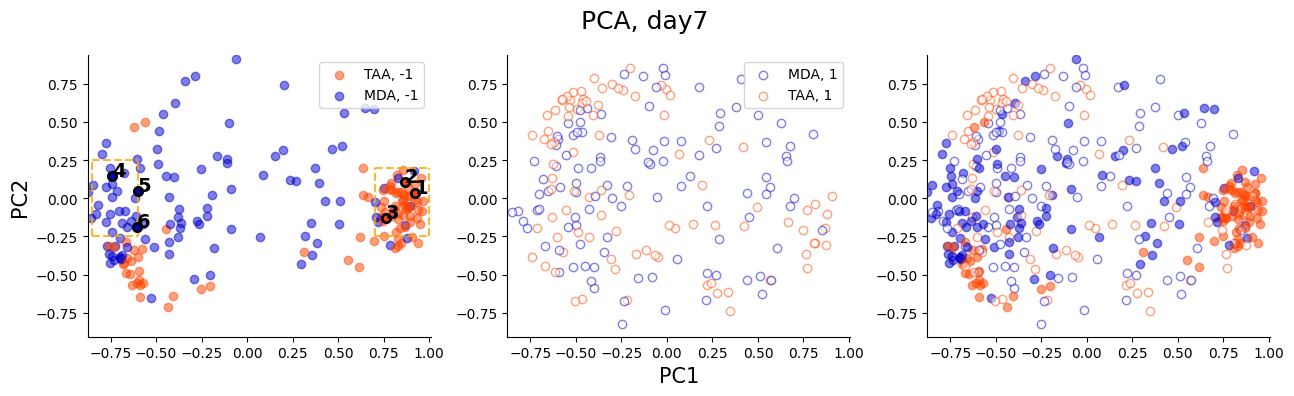

In [98]:
fig_name = "fig2a1.png"
name = f"{root}/{fig_name}"
loc_lst = PCAplot_total_v2(feature_pca_l2, pca_inf, bach_dict, xnum=0, ynum=1, sample=400, pict_sample=3, loc1=[-0.85, -0.6, -0.25, 0.25], loc2=[0.7, 1.0, -0.25, 0.2], seed1=7, title="PCA, day7", figname=name)

In [94]:
for n in range(len(loc_lst)):
    if loc_lst[n][2] < 20:
        filename = "workspace/HE_240205_iwasaka/2024_02_05__0"+str(595+loc_lst[n][2])+"-シングルファイルエクスポート-"+str(loc_lst[n][2]).zfill(2)+".tif"
        print(filename)
    else:
        filename = "workspace/HE_240205_iwasaka/2024_02_05__0"+str(595+loc_lst[n][2]-1)+"-シングルファイルエクスポート-"+str(loc_lst[n][2]-1).zfill(2)+".tif"
        print(filename)

    wsi = OpenSlide(filename)
    print(loc_lst[n][0])
    wsi.read_region(location=tuple(loc_lst[n][1]), level=0, size=(patch_size,patch_size)).convert("RGB").save(root+"/loc_day7_wsl/loc"+str(loc_lst[n][0])+".jpg", "JPEG")

workspace/HE_240205_iwasaka/2024_02_05__0608-シングルファイルエクスポート-13.tif
1
workspace/HE_240205_iwasaka/2024_02_05__0608-シングルファイルエクスポート-13.tif
2
workspace/HE_240205_iwasaka/2024_02_05__0608-シングルファイルエクスポート-13.tif
3
workspace/HE_240205_iwasaka/2024_02_05__0621-シングルファイルエクスポート-26.tif
4
workspace/HE_240205_iwasaka/2024_02_05__0621-シングルファイルエクスポート-26.tif
5
workspace/HE_240205_iwasaka/2024_02_05__0621-シングルファイルエクスポート-26.tif
6


In [102]:
def loc_plot_v3(location, jud, fig_loc, ppi=50, size=112, title="anomaly detection", figname=None):
    y_max = max([i[1] for i in location])
    y_min = min([i[1] for i in location])
    for i in range(len(location)):
        location[i][1] = (location[i][1]-y_min)*(-1)+y_max
    loc=size
    fig, ax = plt.subplots(dpi=100.0)
    ax.set_aspect ('equal')
    xmax = max([i[0] for i in location])+2440
    xmin = min([i[0] for i in location])-2440
    ymax = max([i[1] for i in location])+2440
    ymin = min([i[1] for i in location])-2440
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax_length=ax.bbox.get_points()[1][0]-ax.bbox.get_points()[0][0]
    ax_point = ax_length*ppi/fig.dpi
    xsize=xmax-xmin
    fact=ax_point/xsize
    size*=2*fact

    print(size)
    if size < 1:
        size = 1

    str_loc_lst = [str([int(key.split(", ")[0].split("[")[1]), ((int(key.split(", ")[1].split("]")[0])-y_min)*(-1)+y_max)]) for key in fig_loc.keys()]
    for i in zip(jud, location):
        if i[0] == -1:
            if str(i[1]) in str_loc_lst:
                ax.scatter(i[1][0]+loc, i[1][1]-loc, alpha=1, color="orangered", s=size**2, marker=",", linewidth=3, edgecolors="gold")
                new_loc = [i[1][0], (i[1][1]-y_min)*(-1)+y_max]
                ax.text(i[1][0]+loc, i[1][1]-loc, s=fig_loc[str(new_loc)],  weight="bold")
            else:
                ax.scatter(i[1][0]+loc, i[1][1]-loc, alpha=1, color="orangered", s=size**2, marker=",", linewidth=0, edgecolors="gold")
        else:
            ax.scatter(i[1][0]+loc, i[1][1]-loc, alpha=1, color="lightgray", s=size**2, marker=",", linewidth=0)

    ax.set_title(title, fontsize=18)
    ax.set_aspect ('equal')

    #ax.set_xlim(-130,410)

    ax.grid(False)
    [ax.spines[side].set_visible(False) for side in ['right','top']]

    ax.spines.bottom.set_color('black')
    ax.spines.left.set_color('black')
    #ax.grid(which='both', axis='both')

    plt.tick_params(bottom=True, left=True, right=False, top=False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    plt.tight_layout()
    if figname:
        plt.savefig(figname, dpi=300)
    plt.show()

Percentage of abnormal patches : 0.10949436158603128
0.6873886359136804


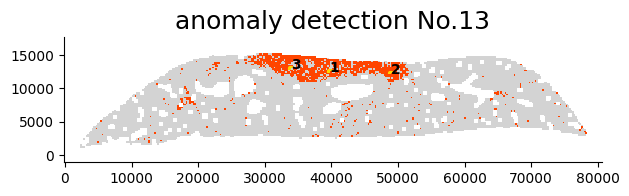

Percentage of abnormal patches : 0.15538009920032392
0.7234840591789956


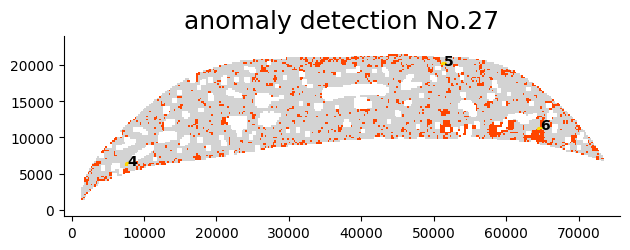

In [103]:
for i in [13, 27]:
    f_path = "workspace/result_v5/"+str(i)+"_layer4.npy"
    l_path = "workspace/result_v5/"+str(i)+"_location.pickle"
    feature = np.load(f_path)
    location = pd.read_pickle(l_path)
    feature_scaled = scaler.fit_transform(feature)
    jud = ocsvm_224_mask_inside_wsl.predict(feature_scaled)
    print("Percentage of abnormal patches : "+str(len([i for i in jud if i == -1])/len([i for i in jud if i == 1])))
    fig_loc = {str(j[1]):j[0] for j in loc_lst if j[2] == i}
    fig_name = {13:"fig2a2.png", 27:"fig2a3.png"}[i]
    name = f"{root}/{fig_name}"
    loc_plot_v3(location, jud, fig_loc, ppi=50, size=112, title="anomaly detection No."+str(i), figname=name)

In [104]:
total_inf_lst = []
for i in [17, 18, 19, 29, 30, 31, 32]:
    f_path = "workspace/result_v5/"+str(i)+"_layer4.npy"
    l_path = "workspace/result_v5/"+str(i)+"_location.pickle"
    feature = np.load(f_path)
    location = pd.read_pickle(l_path)
    feature_scaled = scaler.fit_transform(feature)
    jud = ocsvm_224_mask_inside_wsl.predict(feature_scaled)
    print("sample No."+str(i))
    print(len([i for i in jud if i == 1]))
    print(len([i for i in jud if i == -1]))
    print("Percentage of abnormal patches : "+str(len([i for i in jud if i == -1])/len([i for i in jud if i == 1])))
    feature_inf_lst = get_info(i, feature_scaled, location, jud)
    total_inf_lst = total_inf_lst + feature_inf_lst

sample No.17
12564
835
Percentage of abnormal patches : 0.06645972620184655
max_n =  835
sample No.18
9720
578
Percentage of abnormal patches : 0.059465020576131684
max_n =  578
sample No.19
12269
641
Percentage of abnormal patches : 0.052245496780503706
max_n =  641
sample No.29
13308
1308
Percentage of abnormal patches : 0.09828674481514878
max_n =  1308
sample No.30
12667
1122
Percentage of abnormal patches : 0.08857661640483146
max_n =  1122
sample No.31
14867
1388
Percentage of abnormal patches : 0.09336113540055156
max_n =  1388
sample No.32
13021
1311
Percentage of abnormal patches : 0.10068351125105598
max_n =  1311


In [105]:
pca_feature_l2 = []
ap = pca_feature_l2.append
for i in total_inf_lst:
    x = i[1]
    # l2 normalization
    x_l2_norm = sum(x**2)**0.5
    x_l2_normalized = x / x_l2_norm
    ap(x_l2_normalized)

pca = PCA()
pca.fit(pca_feature_l2)
feature_pca_l2 = pca.transform(pca_feature_l2)

pca_inf = [[i[0], i[2], i[3]] for i in total_inf_lst]

pict_sample_no =  18
pict_sample_no =  29


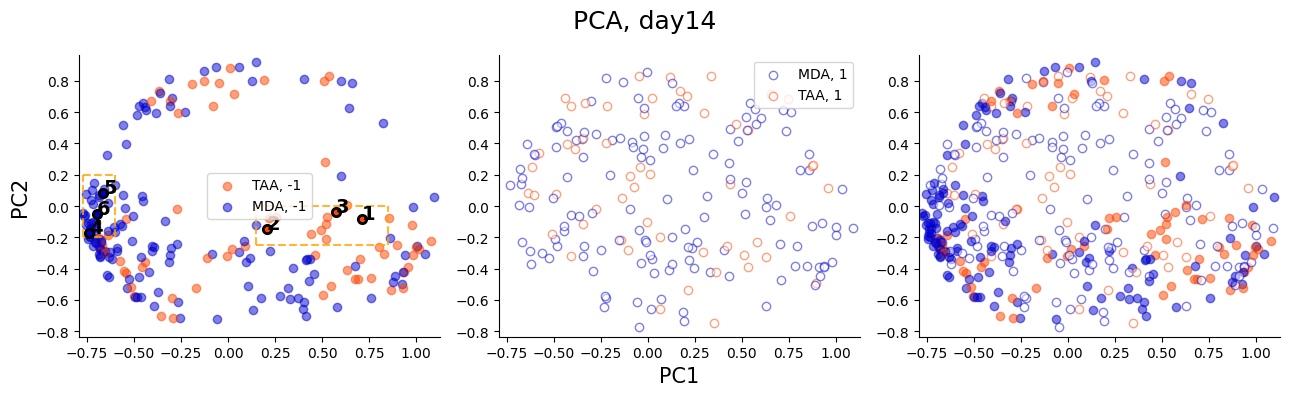

In [114]:
fig_name = "fig2b1.png"
name = f"{root}/{fig_name}"
loc_lst = PCAplot_total_v2(feature_pca_l2, pca_inf, bach_dict, xnum=0, ynum=1, sample=400, pict_sample=3, loc1=[-0.77, -0.6, -0.2, 0.2], loc2=[0.15, 0.85, -0.25, 0], seed1=7, title="PCA, day14", figname=name)

In [113]:
for n in range(len(loc_lst)):
    if loc_lst[n][2] < 20:
        filename = "workspace/HE_240205_iwasaka/2024_02_05__0"+str(595+loc_lst[n][2])+"-シングルファイルエクスポート-"+str(loc_lst[n][2]).zfill(2)+".tif"
        print(filename)
    else:
        filename = "workspace/HE_240205_iwasaka/2024_02_05__0"+str(595+loc_lst[n][2]-1)+"-シングルファイルエクスポート-"+str(loc_lst[n][2]-1).zfill(2)+".tif"
        print(filename)

    wsi = OpenSlide(filename)
    print(loc_lst[n][0])
    wsi.read_region(location=tuple(loc_lst[n][1]), level=0, size=(patch_size,patch_size)).convert("RGB").save(root+"/loc_day14_wsl/loc"+str(loc_lst[n][0])+".jpg", "JPEG")

workspace/HE_240205_iwasaka/2024_02_05__0623-シングルファイルエクスポート-28.tif
4
workspace/HE_240205_iwasaka/2024_02_05__0623-シングルファイルエクスポート-28.tif
5
workspace/HE_240205_iwasaka/2024_02_05__0623-シングルファイルエクスポート-28.tif
6
workspace/HE_240205_iwasaka/2024_02_05__0613-シングルファイルエクスポート-18.tif
1
workspace/HE_240205_iwasaka/2024_02_05__0613-シングルファイルエクスポート-18.tif
2
workspace/HE_240205_iwasaka/2024_02_05__0613-シングルファイルエクスポート-18.tif
3


Percentage of abnormal patches : 0.059465020576131684
0.8558047818585162


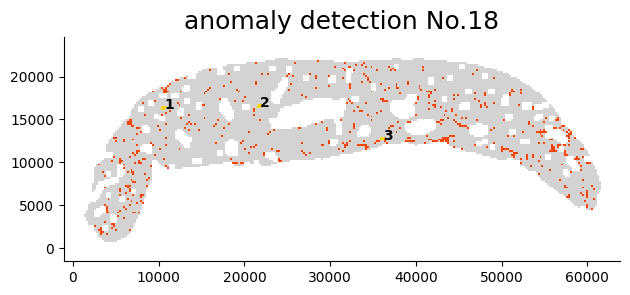

Percentage of abnormal patches : 0.09828674481514878
0.7110382961294286


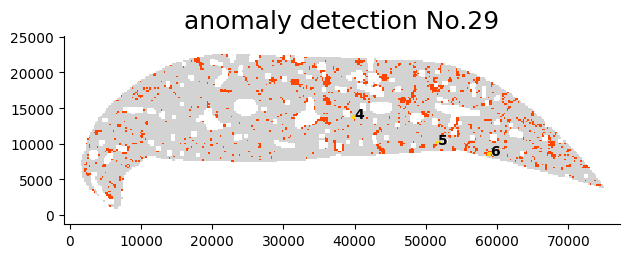

In [115]:
for i in [18, 29]:
    f_path = "workspace/result_v5/"+str(i)+"_layer4.npy"
    l_path = "workspace/result_v5/"+str(i)+"_location.pickle"
    feature = np.load(f_path)
    location = pd.read_pickle(l_path)
    feature_scaled = scaler.fit_transform(feature)
    jud = ocsvm_224_mask_inside_wsl.predict(feature_scaled)
    print("Percentage of abnormal patches : "+str(len([i for i in jud if i == -1])/len([i for i in jud if i == 1])))
    fig_loc = {str(j[1]):j[0] for j in loc_lst if j[2] == i}
    fig_name = {18:"fig2b2.png", 29:"fig2b3.png"}[i]
    name = f"{root}/{fig_name}"
    loc_plot_v3(location, jud, fig_loc, ppi=50, size=112, title="anomaly detection No."+str(i), figname=name)